In [1]:
# import Libraries
import numpy as np
import pandas as pd

In [21]:
#read data as df
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# DATA CLEANING

In [22]:
# CHECK FOR MISSING VALUES
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
#fill in the missing values
median_age = df['Age'].median()
median_age 

28.0

In [24]:
values=median_age 
df['Age'].fillna(value=values,inplace =True)

In [25]:
mode_embarked = df['Embarked'].mode()
mode_embarked 


0    S
Name: Embarked, dtype: object

In [26]:
df['Embarked'].fillna(value='S',inplace =True)

In [27]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [28]:
#DROP COLUMNS THAT ARE NOT NEEDED

In [29]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [30]:
df.drop(columns =['PassengerId', 'Name', 'SibSp','Parch', 'Ticket',  'Cabin', 'Embarked'], inplace = True)

In [31]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,28.0,23.4500
889,1,1,male,26.0,30.0000


In [32]:
# changing the sex column to a numerical value using labelencoder
from sklearn.preprocessing import LabelEncoder

In [33]:
le=LabelEncoder()

In [44]:
df['Sex'] = le.fit_transform(df['Sex'])
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,28,7.2500
1,1,1,0,51,71.2833
2,1,3,0,34,7.9250
3,1,1,0,47,53.1000
4,0,3,1,47,8.0500
...,...,...,...,...,...
886,0,2,1,35,13.0000
887,1,1,0,24,30.0000
888,0,3,0,36,23.4500
889,1,1,1,34,30.0000


In [54]:
#y = target
y= df.Survived

In [55]:
#X = predictors
X = df.drop(columns= ['Survived'])
X

,Pclass,Sex,Age,Fare
0,3,1,28,7.2500
1,1,0,51,71.2833
2,3,0,34,7.9250
3,1,0,47,53.1000
4,3,1,47,8.0500
...,...,...,...,...
886,2,1,35,13.0000
887,1,0,24,30.0000
888,3,0,36,23.4500
889,1,1,34,30.0000


In [49]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [78]:
X_train

,Pclass,Sex,Age,Fare
292,2,1,48,12.8750
217,2,1,56,27.0000
869,3,1,8,11.1333
713,3,1,38,9.4833
133,2,0,38,26.0000
...,...,...,...,...
323,2,0,28,29.0000
361,2,1,38,27.7208
833,3,1,29,7.8542
418,2,1,39,13.0000


In [79]:
X_test

,Pclass,Sex,Age,Fare
23,1,1,36,35.5000
472,2,0,44,27.7500
468,3,1,36,7.7250
425,3,1,36,7.2500
558,1,0,52,79.6500
...,...,...,...,...
246,3,0,33,7.7750
139,1,1,31,79.2000
146,3,1,35,7.7958
866,2,0,35,13.8583


In [80]:
y_train

292    0
217    0
869    1
713    0
133    1
      ..
323    1
361    0
833    0
418    0
155    0
Name: Survived, Length: 712, dtype: int64

In [81]:
y_test 

23     1
472    1
468    0
425    0
558    1
      ..
246    0
139    0
146    1
866    1
462    0
Name: Survived, Length: 179, dtype: int64

In [52]:
from sklearn import tree

In [53]:
decision_model = tree.DecisionTreeClassifier()

In [56]:
decision_model.fit(X,y)

DecisionTreeClassifier()

In [57]:
decision_model.score(X,y)

0.9775533108866442

In [65]:
decision_model.predict(X_test)

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0], dtype=int64)

In [67]:
X

,Pclass,Sex,Age,Fare
0,3,1,28,7.2500
1,1,0,51,71.2833
2,3,0,34,7.9250
3,1,0,47,53.1000
4,3,1,47,8.0500
...,...,...,...,...
886,2,1,35,13.0000
887,1,0,24,30.0000
888,3,0,36,23.4500
889,1,1,34,30.0000


In [68]:
model.predict([[3,1,28,8]])

C:\Users\Vineyard\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [69]:
model.predict([[3,0,28,8]])

C:\Users\Vineyard\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [70]:
model.predict([[1,1,28,8]])

C:\Users\Vineyard\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [71]:
from sklearn.metrics import confusion_matrix

In [76]:
y_test

23     1
472    1
468    0
425    0
558    1
      ..
246    0
139    0
146    1
866    1
462    0
Name: Survived, Length: 179, dtype: int64

In [77]:
X_test

,Pclass,Sex,Age,Fare
23,1,1,36,35.5000
472,2,0,44,27.7500
468,3,1,36,7.7250
425,3,1,36,7.2500
558,1,0,52,79.6500
...,...,...,...,...
246,3,0,33,7.7750
139,1,1,31,79.2000
146,3,1,35,7.7958
866,2,0,35,13.8583


In [83]:
predicted =decision_model.predict(X_test)

In [84]:
cm = confusion_matrix(y_test, predicted)
cm

array([[107,   2],
       [  2,  68]], dtype=int64)

In [85]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

NameError: name 'ConfusionMatrixDisplay' is not defined

Text(69.0, 0.5, 'Truth')

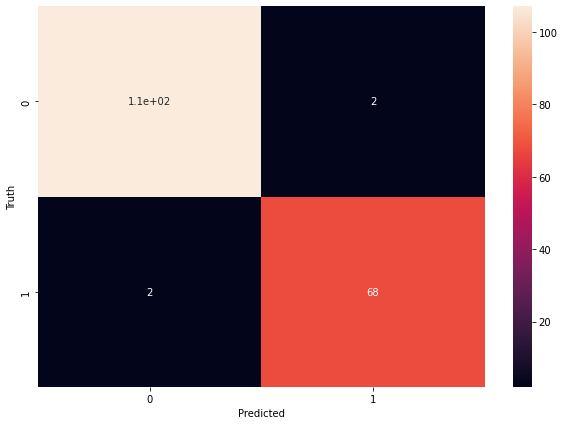

In [87]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [88]:

!pip install pydot
# from sklearn import tree
# tree.plot_tree(dtree)

In [89]:
from IPython.display import Image  
from six import StringIO 
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Pclass', 'Sex', 'Age', 'Fare']

In [ ]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  